# Movie Review Sentiment Analysis 

## Steps we will be following :
- Data Import and Exploration
- Data Preprocessing
- Feature Extraction
- Model Training and Evaluation
- Model Comparison

### Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Dataset

In [3]:
data = pd.read_csv('IMDB_Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Explanation:
- Step 1: We import necessary libraries for data manipulation, model building, and evaluation.
- Step 2: We load the dataset and display the first few rows to understand its structure.

### Step 3: Data Exploration

In [4]:
print(f"Dataset Shape: {data.shape}")
print(data.info())
print(data['sentiment'].value_counts())

Dataset Shape: (50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


#### Explanation:

- Step 3: We explore the dataset to understand its dimensions, data types, and class distribution.

### Step 4: Data Preprocessing

In [5]:
# Converting sentiment labels to binary (positive: 1, negative: 0)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.3, random_state=42)



### Step 5: Feature Extraction using TF-IDF

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Explanation:
- Step 4: We preprocess the data by converting sentiment labels to binary values and splitting the data into training and testing sets.
- Step 5: We extract features from the text using TF-IDF vectorization.

### Step 6: Model Training and Evaluation Function


In [7]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()
    return accuracy

### Step 7: Train and Evaluate Models

Training and evaluating Naive Bayes...
Accuracy: 0.8517333333333333
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7411
           1       0.86      0.85      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



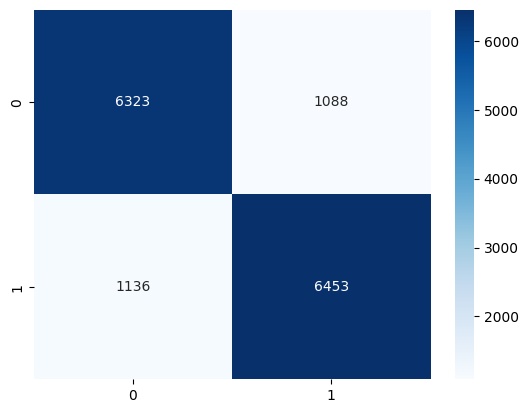

Training and evaluating Random Forest...
Accuracy: 0.8468666666666667
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7411
           1       0.86      0.84      0.85      7589

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



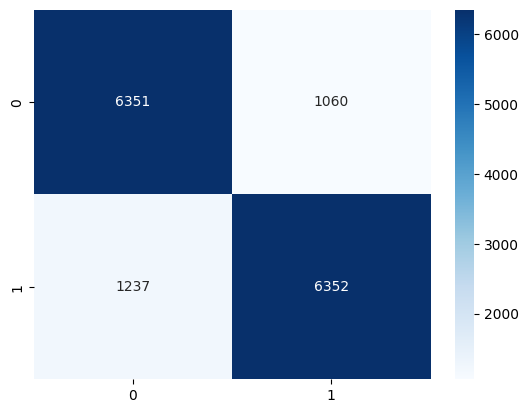

Training and evaluating K-Nearest Neighbors...
Accuracy: 0.7136
              precision    recall  f1-score   support

           0       0.74      0.66      0.69      7411
           1       0.70      0.77      0.73      7589

    accuracy                           0.71     15000
   macro avg       0.72      0.71      0.71     15000
weighted avg       0.72      0.71      0.71     15000



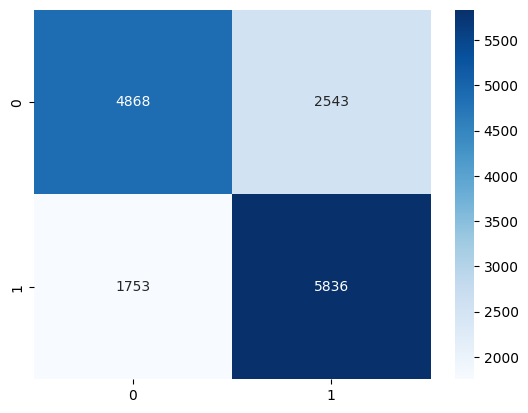

Training and evaluating Logistic Regression...
Accuracy: 0.8943333333333333
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7411
           1       0.89      0.90      0.90      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



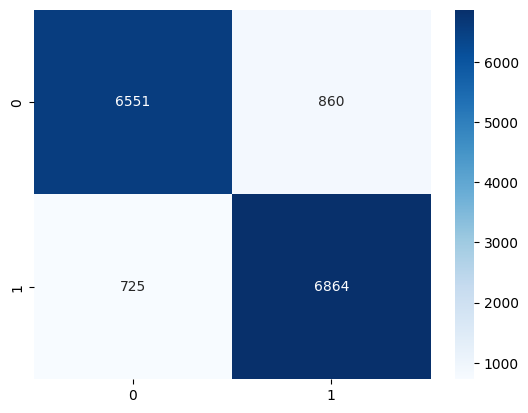

Training and evaluating Decision Tree...
Accuracy: 0.7110666666666666
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      7411
           1       0.72      0.71      0.71      7589

    accuracy                           0.71     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.71      0.71     15000



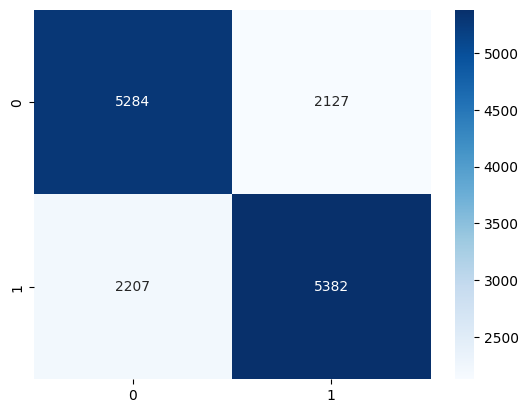

Training and evaluating XGBoost...
Accuracy: 0.8634666666666667
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7411
           1       0.86      0.88      0.87      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



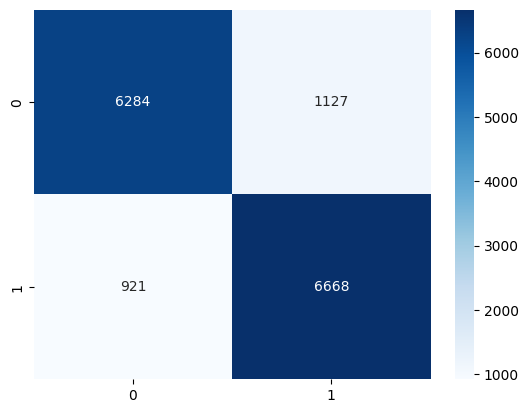

In [8]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

accuracies = {}
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    accuracies[name] = train_and_evaluate(model, X_train_tfidf, X_test_tfidf, y_train, y_test)

### Explanation:

- Step 6: We define a function to train and evaluate models, printing the accuracy, classification report, and confusion matrix.
- Step 7: We train and evaluate multiple models (Naive Bayes, Random Forest, KNN, Logistic Regression, Decision Tree, and XGBoost).

### Step 8: Model Comparison

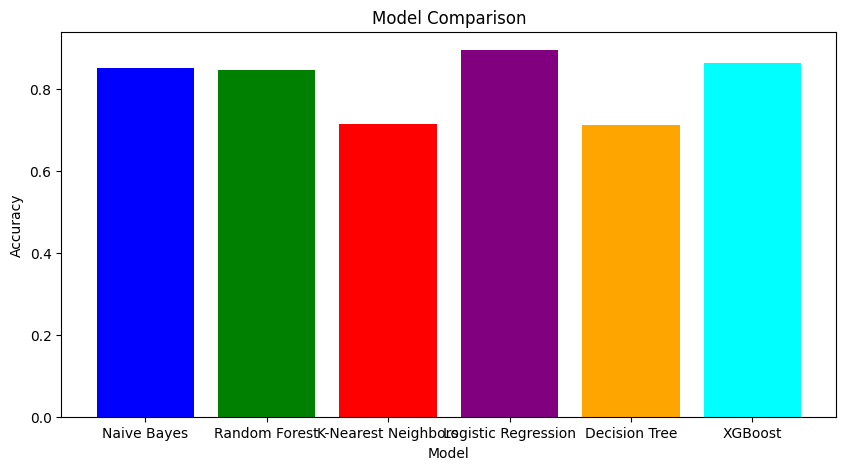

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

### Explanation:

- Step 8: We compare the accuracies of the different models using a bar chart.

### Step 9: Save the Best Model

In [10]:
import joblib
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.pkl')
print(f"The best model, {best_model_name}, has been saved as 'best_model.pkl'")

The best model, Logistic Regression, has been saved as 'best_model.pkl'


### Step 10: Load the Saved Model

In [11]:
loaded_model = joblib.load('best_model.pkl')

### Step 11: Prediction on New Data

In [12]:
new_reviews = [
    "This movie was fantastic! The plot was gripping and the characters were well-developed.",
    "I didn't like this movie at all. It was boring and too long."
]

# Transform the new data using the same TF-IDF vectorizer
new_reviews_tfidf = tfidf_vectorizer.transform(new_reviews)

# Predict sentiments using the loaded model
new_predictions = loaded_model.predict(new_reviews_tfidf)

# Mapping predictions to sentiment labels
sentiment_map = {1: 'positive', 0: 'negative'}
new_predictions_labels = [sentiment_map[pred] for pred in new_predictions]

# Display the predictions
for review, sentiment in zip(new_reviews, new_predictions_labels):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)

Review: This movie was fantastic! The plot was gripping and the characters were well-developed.
Predicted Sentiment: positive
--------------------------------------------------
Review: I didn't like this movie at all. It was boring and too long.
Predicted Sentiment: negative
--------------------------------------------------


### Explanation:

- Step 9: We identify the best model based on the highest accuracy, save it using joblib, and print a confirmation message.
- Step 10: We load the saved model using joblib.
- Step 11: We create a prediction simulation with new data by transforming the new reviews using the same TF-IDF vectorizer and predicting their sentiments with the loaded model. The results are then printed out.